# FINAL PROJECT 3: Ensemble Model (Random Forest)

NATHANIA GUNAWAN        (PYTN-KS09-006) <BR>
PUTRI ALTIKA SARI       (PYTN-KS09-020) <BR>
AUDI MAYORI             (PYTN-KS09-011)

## <font color=#FF7913>A. Perkenalan

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.

## Tentang Dataset

Database ini memiliki 13 atribut.Tujuan dari project ini adalah memprediksi mortalitas akibat gagal jantung dengan menggunakan Ensemble Model (Random Forest dan Boosting).

## Informasi Atribut

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Objektif

Final Project 3 ini dibuat guna mengevaluasi konsep ensemble sebagai berikut:
1.Mampu memahami konsep klasifikasi melalui ensemble model
2.Mampu menyiapkan data untuk digunakan dalam ensemble model
3.Mampu menerapkan ensemble model untuk prediksi

## <font color=#FF7913>B.Import Package

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## <font color=#FF7913>C. Data Loading

### <font color=#6C88C4> Read Dataframe

In [2]:
df = pd.read_csv('C:/Users/ASUS/H8_Python_KS09_MSIB _3/FP3/dataset/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### <font color=#6C88C4> General Info of Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


General information of the data:
1. Semua kolom bertipe numerik
2. Kolom anaemia, diabetes, high_blood_pressure, smoking, dan DEATH_EVENT memiliki value 0 dan 1 (0 artinya "Tidak", 1 artinya "Ya")
3. Kolom sex juga memiliki value 0 dan 1 (0 artinya "Wanita", 1 artinya "Pria")

## <font color=#FF7913>D. Data Cleaning

### <font color=#6C88C4> Checking Duplicate Data

In [4]:
df.duplicated().sum()

0

Tidak terdapat data yang duplikat

### <font color=#6C88C4> Checking Null Values, Filling Missing Data

In [5]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


Pada dataset ini tidak terdapat null values/missing values dan duplicate data, sehingga proses data cleaning tidak perlu dilakukan karena sudah layak untuk diproses.

## <font color=#FF7913>E. Explorasi Data 

### <font color=#6C88C4> Compare Mean of Several Criteria Between Dead and Alive Patients

In [6]:
#Memisahkan dataframe DEATH_EVENT = 0 dan DEATH_EVENT = 1
yes =df[df['DEATH_EVENT'] == 1]
no = df[df['DEATH_EVENT'] == 0]

In [7]:
#create new dataframe to compare the mean of several criterias
dv1 = pd.DataFrame({
    'Keterangan':["Dead","Alive"],
    'age':[yes['age'].mean(),no['age'].mean()],
    'creatinine_phosphokinase':[yes['creatinine_phosphokinase'].mean(),no['creatinine_phosphokinase'].mean()],
    'ejection_fraction':[yes['ejection_fraction'].mean(),no['ejection_fraction'].mean()],
    'platelets':[yes['platelets'].mean(),no['platelets'].mean()],
    'serum_creatinine':[yes['serum_creatinine'].mean(),no['serum_creatinine'].mean()],
    'serum_sodium':[yes['serum_sodium'].mean(),no['serum_sodium'].mean()]
})
dv1 = dv1.set_index("Keterangan")

In [8]:
#creating function to mark the higher value
def highlight_max(s):
    is_max = s == s.max()
    font_color = 'blue'
    font_weight = 'bold'
    return ['color: {}; font-weight: {}'.format(font_color, font_weight) if cell else '' for cell in is_max]

In [9]:
#coloring the table
highlight=lambda x: ['background: #FFB3BA' if x.name in ["Dead"] else 'background: #BAFFC9' for i in x]
dv1.style.apply(highlight_max).apply(highlight,axis=1)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
Keterangan,,,,,,
Dead,65.215281,670.197917,33.468750,256381.044792,1.835833,135.375000
Alive,58.761906,540.054187,40.266010,266657.489901,1.184877,137.216749


Berdasarkan tabel di atas, dapat dilihat bahwa:
1. Pasien yang meninggal selama perawatan memiliki rata-rata usia, kadar creatinine phosphokinase, dan serum creatinine yang lebih tinggi dibandingkan dengan pasien yang tetap bertahan hidup
2. Pasien yang meninggal selama perawatan memiliki rata-rata ejection fraction, platelets, dan serum sodium yang lebih rendah dibandingkan dengan pasien yang tetap bertahan hidup

### <font color=#6C88C4> Compare Death Events of Complication Between Heart Failure and Another Factor

**1. Anaemia**

In [10]:
#Memisahkan dataframe anaemia = 0 dan anaemia = 1
ay =df[df['anaemia'] == 1]
an = df[df['anaemia'] == 0]

Jika anaemia = 1, artinya pasien tersebut mengidap anaemia. Sebaliknya, jika anaemia = 0, artinya pasien tersebut tidak mengidap anaemia.

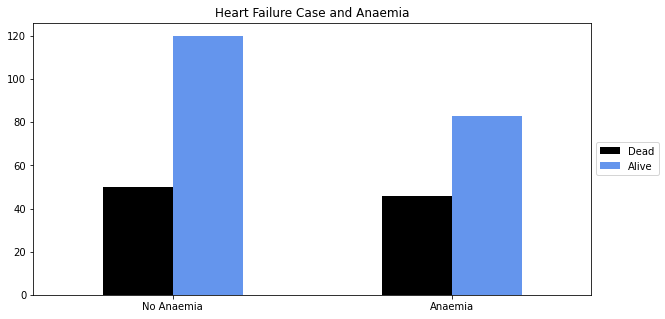

In [11]:
data = {"Dead":[an['DEATH_EVENT'].value_counts()[1], ay['DEATH_EVENT'].value_counts()[1]],
        "Alive":[an['DEATH_EVENT'].value_counts()[0], ay['DEATH_EVENT'].value_counts()[0]]
        };

index = ["No Anaemia", "Anaemia"];     

dataFrame = pd.DataFrame(data=data, index=index);

dataFrame.plot.bar(rot=0,title="Heart Failure Case and Anaemia", color=['black','cornflowerblue'],figsize=(10,5));
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show(block=True);

Jumlah pasien dengan penyakit gagal jantung lebih banyak bertahan hidup, baik ia memiliki penyakit anaemia ataupun tidak.

**2. Diabetes**

In [12]:
#Memisahkan dataframe diabetes = 0 dan diabetes = 1
dy =df[df['diabetes'] == 1]
dn = df[df['diabetes'] == 0]

Jika diabetes = 1, artinya pasien tersebut mengidap diabetes. Sebaliknya, jika diabetes = 0, artinya pasien tersebut tidak mengidap diabetes.

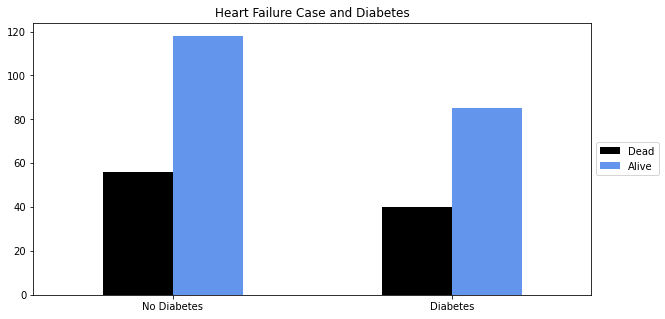

In [13]:
data = {"Dead":[dn['DEATH_EVENT'].value_counts()[1], dy['DEATH_EVENT'].value_counts()[1]],
        "Alive":[dn['DEATH_EVENT'].value_counts()[0], dy['DEATH_EVENT'].value_counts()[0]]
        };

index = ["No Diabetes", "Diabetes"];     

dataFrame = pd.DataFrame(data=data, index=index);

dataFrame.plot.bar(rot=0,title="Heart Failure Case and Diabetes", color=['black','cornflowerblue'],figsize=(10,5));
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show(block=True);

Jumlah pasien dengan penyakit gagal jantung lebih banyak bertahan hidup, baik ia memiliki penyakit diabetes ataupun tidak.

**3. Tekanan Darah Tinggi**

In [14]:
#Memisahkan dataframe high_blood_pressure = 0 dan high_blood_pressure = 1
hy =df[df['high_blood_pressure'] == 1]
hn = df[df['high_blood_pressure'] == 0]

Jika high_blood_pressure = 1, artinya pasien tersebut mengidap tekanan darah tinggi. Sebaliknya, jika high_blood_pressure = 0, artinya pasien tersebut tidak mengidap tekanan darah tinggi.

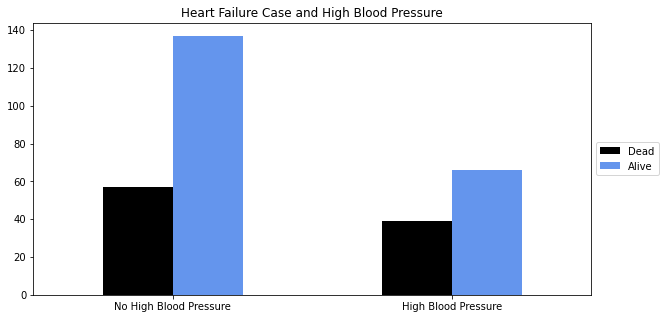

In [15]:
data = {"Dead":[hn['DEATH_EVENT'].value_counts()[1], hy['DEATH_EVENT'].value_counts()[1]],
        "Alive":[hn['DEATH_EVENT'].value_counts()[0], hy['DEATH_EVENT'].value_counts()[0]]
        };

index = ["No High Blood Pressure", "High Blood Pressure"];     

dataFrame = pd.DataFrame(data=data, index=index);

dataFrame.plot.bar(rot=0,title="Heart Failure Case and High Blood Pressure", color=['black','cornflowerblue'],figsize=(10,5));
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show(block=True);

Jumlah pasien dengan penyakit gagal jantung lebih banyak bertahan hidup, baik ia memiliki riwayat tekanan darah tinggi ataupun tidak.

**4. Smoke**

In [16]:
#Memisahkan dataframe smoking = 0 dan smoking = 1
sy =df[df['smoking'] == 1]
sn = df[df['smoking'] == 0]

Jika smoking = 1, artinya pasien merupakan perokok. Sebaliknya, jika high_blood_pressure = 0, artinya pasien tersebut bukan perokok.

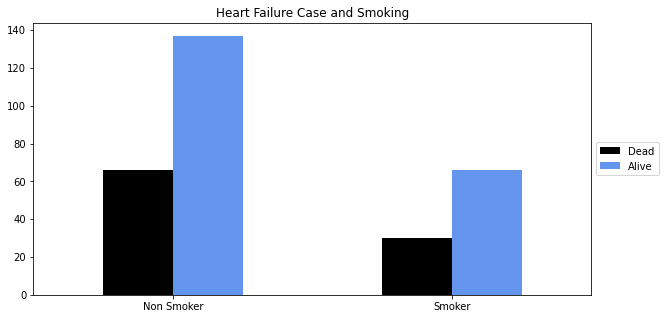

In [17]:
data = {"Dead":[sn['DEATH_EVENT'].value_counts()[1], sy['DEATH_EVENT'].value_counts()[1]],
        "Alive":[sn['DEATH_EVENT'].value_counts()[0], sy['DEATH_EVENT'].value_counts()[0]]
        };

index = ["Non Smoker", "Smoker"];     

dataFrame = pd.DataFrame(data=data, index=index);

dataFrame.plot.bar(rot=0,title="Heart Failure Case and Smoking", color=['black','cornflowerblue'],figsize=(10,5));
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show(block=True)

Jumlah pasien dengan penyakit gagal jantung lebih banyak bertahan hidup, baik ia merupakan perokok ataupun tidak.

**Proporsi Faktor Lain Pada Kasus Kematian Akibat Gagal Jantung**

In [18]:
#Create new dataframe based on dead cases of heart failure
dead = pd.DataFrame({'Factors':['Anaemia','Diabetes','High Blood Pressure','Smoking','Without Other Factor'],
                     'Values':[yes['anaemia'].value_counts()[1], 
                               yes['diabetes'].value_counts()[1],
                               yes['high_blood_pressure'].value_counts()[1],
                               yes['smoking'].value_counts()[1],
                              yes[(yes["anaemia"]==0) & (yes["diabetes"]==0)& (yes["high_blood_pressure"]==0)& (yes["smoking"]==0)]['anaemia'].value_counts()[0]]})
dead

,Factors,Values
0,Anaemia,46
1,Diabetes,40
2,High Blood Pressure,39
3,Smoking,30
4,Without Other Factor,13


In [19]:
#Define color for the pie chart
colors1 = sns.color_palette("Spectral",5)

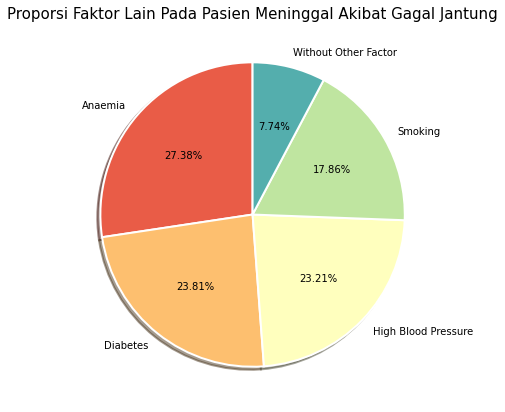

In [20]:
#Construct pie chart
dead.Values.plot(kind='pie',figsize=(12, 7),autopct='%1.2f%%',startangle=90,shadow=True,subplots=True, colors=colors1,
           textprops={'fontsize': 10},labels=dead.Factors,legend=False,wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Proporsi Faktor Lain Pada Pasien Meninggal Akibat Gagal Jantung', loc='center',size ='15')
plt.axis('off')
plt.show()

Jumlah pasien dengan penyakit gagal jantung yang meninggal selama perawatan paling banyak merupakan pengidap anaemia (27,38%), diikuti oleh diabetes (23.81%), memiliki darah tinggi (23.21%), dan merupakan perokok (17.86%). Sedangkan yang paling sedikit proporsinya adalah orang yang murni meninggal karena gagal jantung tanpa disertai faktor lainnya (7.74%).

### <font color=#6C88C4> Compare Death Events Based on Gender

In [21]:
#Grouping death cases by the sex
gender = yes.groupby(['sex'],as_index=True).agg({'sex':'count'}, index=False)

In [22]:
#Define color for the pie chart
colors2 = ['coral','royalblue']

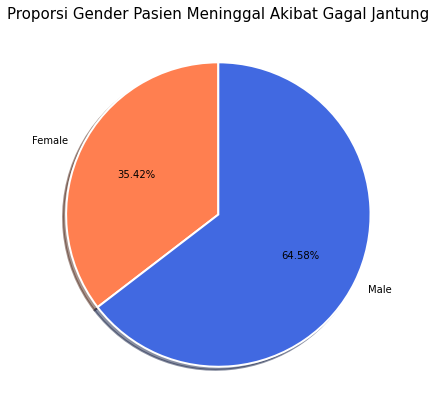

In [23]:
gender.plot(kind='pie',figsize=(12, 7),autopct='%1.2f%%',startangle=90,shadow=True,subplots=True,colors=colors2,
           textprops={'fontsize': 10},labels=['Female','Male'],legend=False,wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Proporsi Gender Pasien Meninggal Akibat Gagal Jantung', loc='center',size ='15')
plt.axis('off')
plt.show()

Pasien yang meninggal akibat gagal jantung sebagian besar merupakan pria (64,58%), sedangkan wanita hanya 35,42%.

## <font color=#FF7913>F. Data Preprocessing

### <font color=#6C88C4> Split Data

Data yang akan digunakan untuk training adalah sebesar 75%, sedangkan 25% sisanya digunakan untuk testing

In [24]:
train, test = train_test_split(df, test_size=0.25, random_state=2)

Pada analisis ini, kelompok kami menggunakan 12 atribut dari dataframe untuk metode Random Forest karena hasil akurasi dari modelnya sudah cukup akurat (> 90%).

In [25]:
x_train = train.drop(['DEATH_EVENT'],axis=1)
y_train = train[['DEATH_EVENT']]

In [26]:
x_test = test.drop(['DEATH_EVENT'],axis=1)
y_test = test[['DEATH_EVENT']]

## <font color='Maroon'> Random Forest

### <font color=#FF7913> 1. Pendefinisian dan Pelatihan Model

#### <font color=#6C88C4> Create and Fit Model

In [27]:
rf = RandomForestClassifier(n_estimators=100)

#### <font color=#6C88C4> Train the model using the training data

In [28]:
rf.fit(x_train,y_train)

RandomForestClassifier()

### <font color=#FF7913> 2. Evaluasi Model

#### <font color=#6C88C4> Get Results

**Predict the testing data using the model**

In [29]:
y_pred = rf.predict(x_test)

**Model Accuration**

In [30]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


**Tingkat akurasi dari model di atas adalah 93,33%**

#### <font color='cornflowerblue'>Confusion Matrix

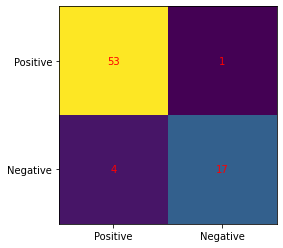

In [31]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive (53) > False Positive (1) dan False Negative (4) < True Negative (17).**

### <font color=#FF7913> 3. Model Inference

#### <font color=#6C88C4> Get Results

**Predict the testing data using the new data**

In [32]:
new_df = pd.DataFrame({'age':[50,63,70],
                     'anaemia':[0,1,1],
                    'creatinine_phosphokinase':[583,600,754],
                    'diabetes':[1,1,1],
                    'ejection_fraction':[35,30,25],
                    'high_blood_pressure':[1,0,0],
                    'platelets':[264000.00,264512.00,254333.00],
                    'serum_creatinine':[1.9,2.5,1.6],
                    'serum_sodium':[136,134,120],
                    'sex':[1,1,1],
                    'smoking':[0,0,0],
                    'time':[241,207,198]})
new_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,50,0,583,1,35,1,264000.0,1.9,136,1,0,241
1,63,1,600,1,30,0,264512.0,2.5,134,1,0,207
2,70,1,754,1,25,0,254333.0,1.6,120,1,0,198


**Hasil Prediksi dari Data Baru**

In [33]:
y_pred = rf.predict(new_df)
y_pred

array([0, 0, 0], dtype=int64)

## <font color=#FF7913> G. Pengambilan Kesimpulan

1. Pasien yang meninggal selama perawatan memiliki rata-rata usia, kadar creatinine phosphokinase, dan serum creatinine yang lebih tinggi dibandingkan dengan pasien yang tetap bertahan hidup
2. Pasien yang meninggal selama perawatan memiliki rata-rata ejection fraction, platelets, dan serum sodium yang lebih rendah dibandingkan dengan pasien yang tetap bertahan hidup
3. Jumlah pasien dengan penyakit gagal jantung yang meninggal selama perawatan paling banyak merupakan pengidap anaemia (27,38%), diikuti oleh diabetes (23.81%), memiliki darah tinggi (23.21%), dan merupakan perokok (17.86%). Sedangkan yang paling sedikit proporsinya adalah orang yang murni meninggal karena gagal jantung tanpa disertai faktor lainnya (7.74%).
4. Pasien yang meninggal akibat gagal jantung sebagian besar merupakan pria (64,58%), sedangkan wanita hanya 35,42%
5. Penggunaan random forest classifier pada data ini menghasilnya akurasi sebesar 93.33% sehingga dapat dikatakan cukup akurat.